In [ ]:
import zipfile as zf

In [ ]:
zipRef = zf.ZipFile('archive.zip')

In [ ]:
zipRef.extractall('dataset')

In [ ]:
zipRef.close()

In [ ]:
trainDir = 'dataset/training_set/training_set'
testDir = 'dataset/test_set/test_set'

In [ ]:
import os
for dirPath, dirNames, fileNames in os.walk('dataset'):
  print(f'there are {len(dirNames)} directories and {len(fileNames)} files in {dirPath}')
  for filename in fileNames:
    if not filename.lower().endswith(".jpg"):
      file_path = os.path.join(dirPath, filename)
      os.remove(file_path)

there are 2 directories and 0 files in dataset
there are 1 directories and 0 files in dataset/training_set
there are 2 directories and 0 files in dataset/training_set/training_set
there are 0 directories and 4001 files in dataset/training_set/training_set/cats
there are 0 directories and 4006 files in dataset/training_set/training_set/dogs
there are 1 directories and 0 files in dataset/test_set
there are 2 directories and 0 files in dataset/test_set/test_set
there are 0 directories and 1012 files in dataset/test_set/test_set/cats
there are 0 directories and 1013 files in dataset/test_set/test_set/dogs


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('dataset/training_set/training_set')
classNames = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [ ]:
classNames

array(['cats', 'dogs'], dtype='<U4')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as matimg
import random

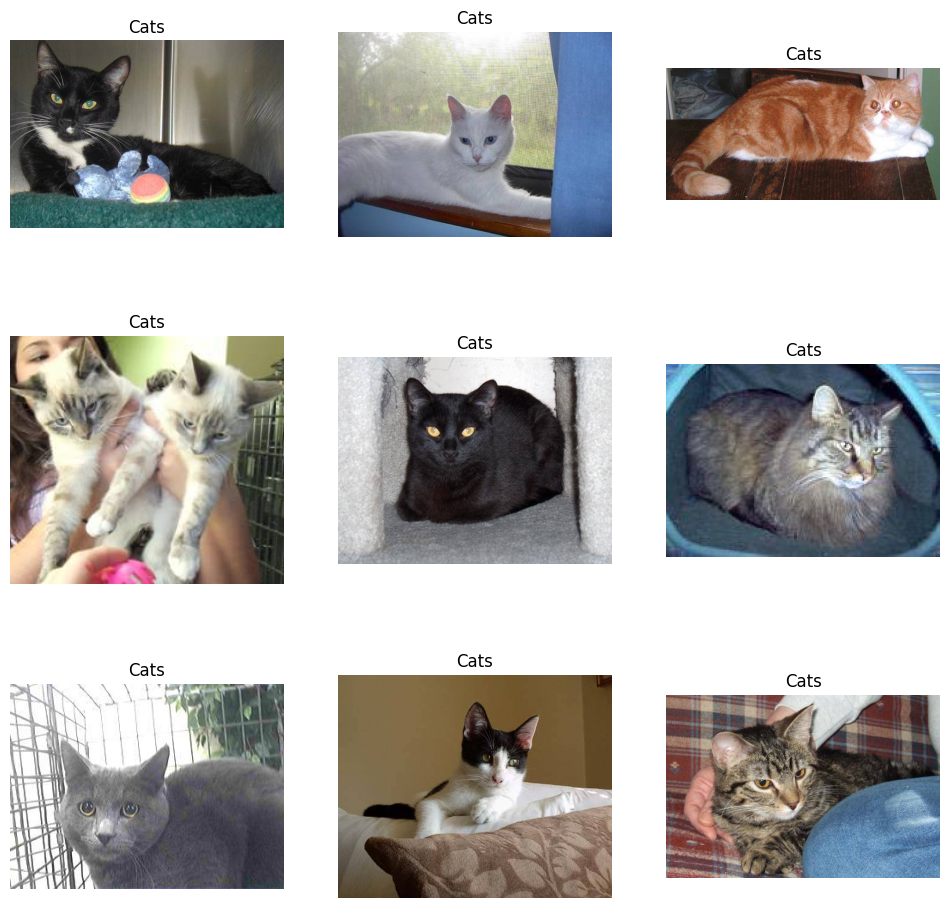

In [ ]:
catsImgs = os.listdir('training_set/training_set/cats')
plt.figure(figsize=(12,12))
for i in range(9):
  randomImg = random.choice(catsImgs)
  imgArray = matimg.imread(f'training_set/training_set/cats/{randomImg}')
  plt.subplot(3,3, i+1)
  plt.imshow(imgArray)
  plt.title("Cats")
  plt.axis(False)

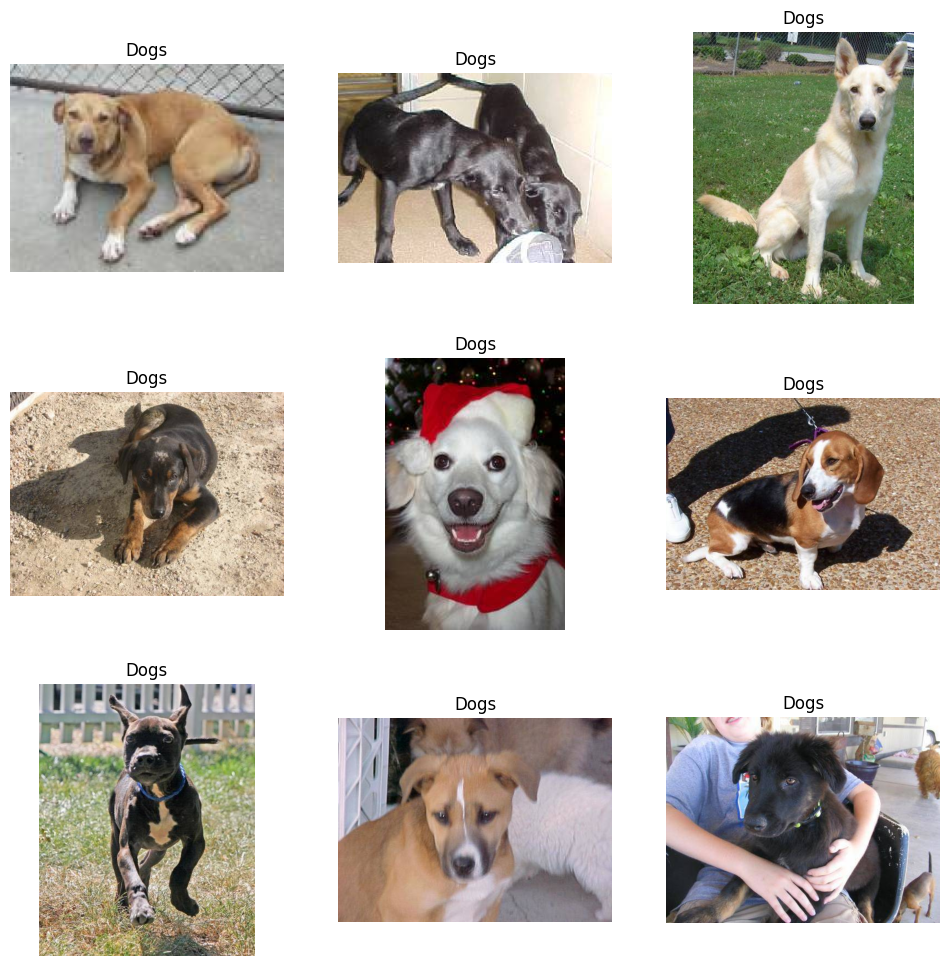

In [ ]:
dogsImgs = os.listdir('dataset/training_set/training_set/dogs')
plt.figure(figsize=(12,12))
for i in range(9):
  randomImg = random.choice(dogsImgs)
  imgArray = matimg.imread(f'dataset/training_set/training_set/dogs/{randomImg}')
  plt.subplot(3,3, i+1)
  plt.imshow(imgArray)
  plt.title("Dogs")
  plt.axis(False)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
trainDataAugmented = ImageDataGenerator(rescale= 1/255,
                                        rotation_range= 0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2)
testDataAugmented = ImageDataGenerator(rescale= 1/255)

In [ ]:
trainDataAugmentedShuffled = trainDataAugmented.flow_from_directory(trainDir,
                                                                    target_size = (224,224),
                                                                    shuffle=True,
                                                                    class_mode="binary",
                                                                    batch_size=64
                                                                    )

Found 8005 images belonging to 2 classes.


In [ ]:
testDataAugmentedShuffled = testDataAugmented.flow_from_directory(testDir,
                                                                    target_size = (224,224),
                                                                    class_mode="binary",
                                                                    batch_size=64
                                                                    )

Found 2023 images belonging to 2 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential

In [ ]:
computerVisionCatVSDogs = Sequential([
    Conv2D(16,3, activation='relu', input_shape = (224,224,3)),
    Conv2D(32,3, activation='relu'),
    MaxPool2D(pool_size=2),
    Conv2D(64,3, activation='relu'),
    Conv2D(128,3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(128, activation = 'relu'),
    Dropout(0.5),
    Dense(1,'sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
computerVisionCatVSDogs.compile(
    loss= "binary_crossentropy",
    optimizer = Adam(learning_rate=1e-4),
    metrics=["accuracy"]
)

In [ ]:
history = computerVisionCatVSDogs.fit(
    trainDataAugmentedShuffled,
    epochs = 16,
    validation_data = testDataAugmentedShuffled,
    validation_batch_size = len(testDataAugmentedShuffled)
)

Epoch 1/16
126/126 ━━━━━━━━━━━━━━━━━━━━ 106s 843ms/step - accuracy: 0.7328 - loss: 0.5434 - val_accuracy: 0.7182 - val_loss: 0.5458
Epoch 2/16
126/126 ━━━━━━━━━━━━━━━━━━━━ 106s 839ms/step - accuracy: 0.7264 - loss: 0.5452 - val_accuracy: 0.7410 - val_loss: 0.5310
Epoch 3/16
126/126 ━━━━━━━━━━━━━━━━━━━━ 104s 828ms/step - accuracy: 0.7436 - loss: 0.5212 - val_accuracy: 0.7573 - val_loss: 0.4937
Epoch 4/16
126/126 ━━━━━━━━━━━━━━━━━━━━ 106s 839ms/step - accuracy: 0.7358 - loss: 0.5201 - val_accuracy: 0.7696 - val_loss: 0.4713
Epoch 5/16
126/126 ━━━━━━━━━━━━━━━━━━━━ 106s 838ms/step - accuracy: 0.7430 - loss: 0.5077 - val_accuracy: 0.7682 - val_loss: 0.4826
Epoch 6/16
126/126 ━━━━━━━━━━━━━━━━━━━━ 105s 831ms/step - accuracy: 0.7519 - loss: 0.5083 - val_accuracy: 0.7835 - val_loss: 0.4662
Epoch 7/16
126/126 ━━━━━━━━━━━━━━━━━━━━ 106s 841ms/step - accuracy: 0.7482 - loss: 0.5110 - val_accuracy: 0.7790 - val_loss: 0.4634
Epoch 8/16
126/126 ━━━━━━━━━━━━━━━━━━━━ 106s 839ms/step - accuracy: 0.7565 -

In [ ]:
computerVisionCatVSDogs.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 220, 220, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 110, 110, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 108, 108, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 106, 106, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 359552)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    46,022,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,361,061 (527.81 MB)

 Trainable params: 46,120,353 (175.94 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 92,240,708 (351.87 MB)

In [ ]:
def load_and_prep_image(filename, img_shape=224):

    img = tf.io.read_file(filename)
    img = tf.image.decode_image(img)
    img = tf.image.resize(img, size=[img_shape, img_shape])
    img = img/255.
    return img

In [ ]:
def pred_and_plot(model, filename, class_names=classNames):

    img = load_and_prep_image(filename)

    pred = computerVisionCatVSDogs.predict(tf.expand_dims(img, axis=0))

    pred_class = class_names[int(tf.round(pred))]

    catOrDog = ''
    if pred_class == 'cats':
      catOrDog = 'A Cat'
    else:
      catOrDog = 'A Dog'

    plt.imshow(img)
    plt.title(f"Prediction: {catOrDog}")
    plt.axis(False);

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


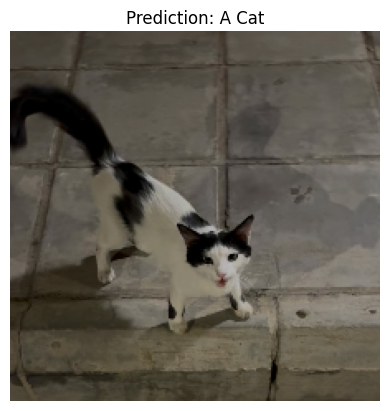

In [ ]:
pred_and_plot(computerVisionCatVSDogs, filename='/content/bagira.jpg')